In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pp
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [64]:
df=pd.read_excel('fbdatafile.xlsx')
#type(df)
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [65]:
# EDA using pandas profiling
df1=pp.ProfileReport(df)
df1
#df1.to_file('fbdatafile_eda.html')

Number of variables,15
Number of observations,99003
Total Missing (%),0.0%
Total size in memory,11.3 MiB
Average record size in memory,120.0 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


from above info we see that there are some missing values in the gender and tenure

## Missing Value Treatment

missing value treatment
As Gender is the categorical value, lets replace it with the mode of the cloumn
similarly lets replace the tenure with the median of the column
lets do this yayyy

In [67]:
#replacing the null values in gender with mode
df['gender']= df['gender'].fillna(df['gender'].mode()[0])

In [68]:
df['gender'].isnull().sum()

0

In [70]:
df['tenure'].isnull().sum() #calculating the no. of null values in cloumn tenure

2

In [71]:
#replacing the null values in tenure with median
df['tenure']=df['tenure'].fillna(df['tenure'].median())

In [72]:
df['tenure'].isnull().sum() #calculating the no. of null values in cloumn tenure after fillna

0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


now form above we see that there are no null values in the dataframe

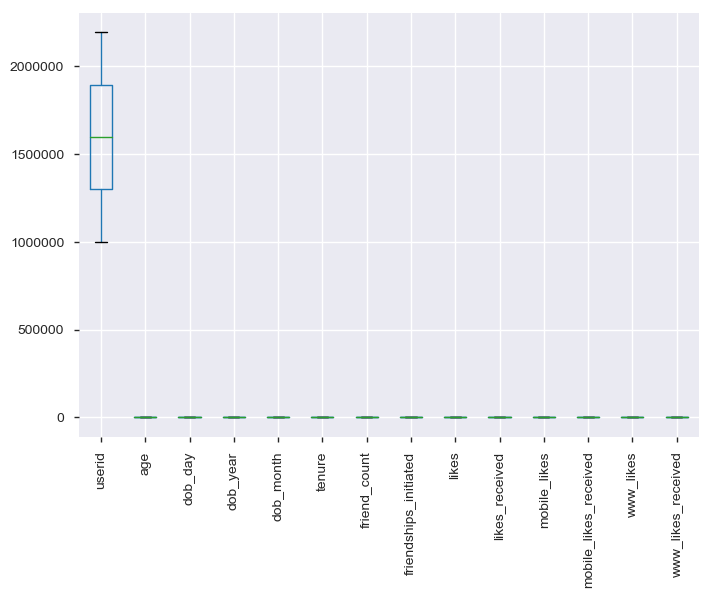

In [74]:
# plotting boxplot for checking the outliers
df.boxplot()
plt.xticks(rotation=90)
plt.show();

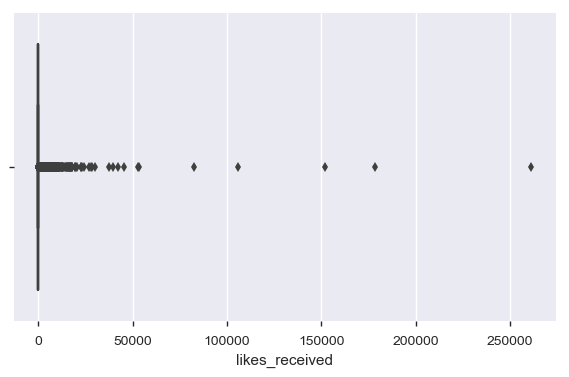

In [94]:
#plotting boxplot for likes_received column
plt.figure(figsize=(7,4))
sns.boxplot(df.likes_received)
plt.show();

In [14]:
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [76]:
#count of gender
df.groupby('gender').size()

gender
female    40254
male      58749
dtype: int64

In [77]:
#creating function Convert_gender to have dummy coding for gender female =1 and male = 0
def convert_gender(gender):
    if gender == 'female':
        gender = 1
    else:
        gender = 0
    return gender

#you can also use pd.getdummies method to create dummies

In [78]:
#using function convert_gender to create dummy coding
df['gender']=df['gender'].apply(convert_gender)

In [79]:
#count of gender after dummy coding of gender
df.groupby('gender').size()

gender
0    58749
1    40254
dtype: int64

In [80]:
df.head() #checking if gender variables are replaced with dummies

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,0,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,1,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,0,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,1,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,0,82.0,0,0,0,0,0,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null int64
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(14)
memory usage: 11.3 MB


In [82]:
#converting the tenure datatype from float to int
df['tenure']=df['tenure'].astype(int)
df['tenure'].head()

0    266
1      6
2     13
3     93
4     82
Name: tenure, dtype: int32

In [83]:
df.head() #checking the tenure float to int converion

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,0,266,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,1,6,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,0,13,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,1,93,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,0,82,0,0,0,0,0,0,0,0


In [84]:
df.info() #from result all datatypes have int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null int64
tenure                   99003 non-null int32
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: int32(1), int64(14)
memory usage: 11.0 MB


Now from above data frame we see that all the columns have numeric values. Proceed with outlier treatment

In [85]:
#dropping column UserID as it unique and random and doesnt contribute to the insights
df_drop=df.drop(['userid'], axis = 1)
df_drop.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14,19,1999,11,0,266,0,0,0,0,0,0,0,0
1,14,2,1999,11,1,6,0,0,0,0,0,0,0,0
2,14,16,1999,11,0,13,0,0,0,0,0,0,0,0
3,14,25,1999,12,1,93,0,0,0,0,0,0,0,0
4,14,4,1999,12,0,82,0,0,0,0,0,0,0,0


## Outlier Treatment

outlier treatment:
    1. flooring and capping
    2. z score
    3. IQR

we are using the flooring and capping method

In [86]:
#lets perform flooring and capping
np.round(df_drop.quantile(np.arange(0,1.05,0.05)),2) #calculating the percentiles including min and max 0th% and 100th %

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0.00,13.0,1.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.05,15.0,1.0,1923.0,1.0,0.0,47.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,17.0,2.0,1946.0,1.0,0.0,98.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
0.15,18.0,4.0,1953.0,2.0,0.0,146.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
0.20,19.0,5.0,1958.0,3.0,0.0,188.0,24.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,20.0,7.0,1963.0,3.0,0.0,226.0,31.0,17.0,1.0,1.0,0.0,0.0,0.0,0.0
0.30,22.0,8.0,1969.0,4.0,0.0,263.0,39.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0
0.35,23.0,10.0,1974.0,4.0,0.0,297.0,48.0,26.0,3.0,2.0,0.0,1.0,0.0,0.0
0.40,25.0,11.0,1979.0,5.0,0.0,334.0,58.0,32.0,5.0,3.0,1.0,2.0,0.0,1.0
0.45,26.0,13.0,1982.0,6.0,0.0,373.0,69.0,39.0,7.0,5.0,2.0,3.0,0.0,1.0


In [87]:
#calculating 1% and 100%
np.round(df_drop.quantile([0.01,0.99]))

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0.01,14.0,1.0,1905.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,108.0,31.0,1999.0,12.0,1.0,2049.0,1919.0,932.0,2383.0,2134.0,1755.0,1293.0,1001.0,914.0


In [88]:
np.round(df_drop.describe(),2)

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00
mean,37.28,14.53,1975.72,6.28,0.41,537.88,196.35,107.45,156.08,142.69,106.12,84.12,49.96,58.57
std,22.59,9.02,22.59,3.53,0.49,457.65,387.30,188.79,572.28,1387.92,445.25,839.89,285.56,601.42
min,13.00,1.00,1900.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,7.00,1963.00,3.00,0.00,226.00,31.00,17.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,28.00,14.00,1985.00,6.00,0.00,412.00,82.00,46.00,11.00,8.00,4.00,4.00,0.00,2.00
75%,50.00,22.00,1993.00,9.00,1.00,675.00,206.00,117.00,81.00,59.00,46.00,33.00,7.00,20.00
max,113.00,31.00,2000.00,12.00,1.00,3139.00,4923.00,4144.00,25111.00,261197.00,25111.00,138561.00,14865.00,129953.00


In [89]:
np.round(df_drop.quantile([0.01,0.99]))
#np.round(df.quantile(np.arange(0,1.05,0.05)),2) 

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0.01,14.0,1.0,1905.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,108.0,31.0,1999.0,12.0,1.0,2049.0,1919.0,932.0,2383.0,2134.0,1755.0,1293.0,1001.0,914.0


In [91]:
for x in df_drop.columns:
    percentiles=df_drop[x].quantile([0.01,0.99]).values
    #print(percentiles)
    df_drop[x][df_drop[x]<=percentiles[0]]=percentiles[0]
    df_drop[x][df_drop[x]>=percentiles[1]]=percentiles[1]

In [31]:
#l=df.loc[:,'age':]
#l.count()

In [92]:
np.round(df_drop.describe(),2)

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00
mean,37.27,14.53,1975.73,6.28,0.41,536.04,184.86,103.22,135.02,107.64,89.35,62.42,38.19,42.99
std,22.55,9.02,22.55,3.53,0.49,450.66,297.96,157.70,357.48,305.31,255.04,181.91,137.90,129.44
min,14.00,1.00,1905.00,1.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,7.00,1963.00,3.00,0.00,226.00,31.00,17.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,28.00,14.00,1985.00,6.00,0.00,412.00,82.00,46.00,11.00,8.00,4.00,4.00,0.00,2.00
75%,50.00,22.00,1993.00,9.00,1.00,675.00,206.00,117.00,81.00,59.00,46.00,33.00,7.00,20.00
max,108.00,31.00,1999.00,12.00,1.00,2049.00,1918.84,932.00,2382.96,2133.96,1754.92,1292.96,1001.00,913.96


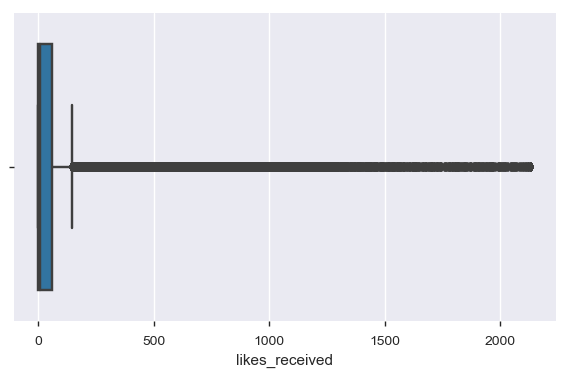

In [95]:
#plotting boxplot for like_received column
plt.figure(figsize=(7,4))
sns.boxplot(df_drop.likes_received)
plt.show();

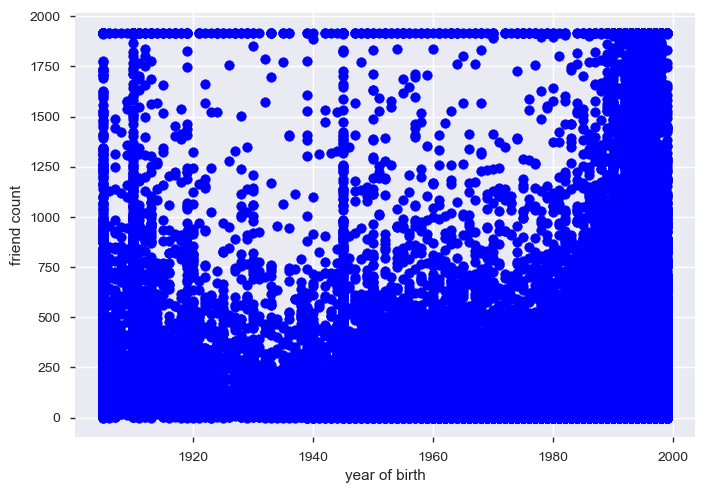

In [96]:
plt.scatter(df_drop.dob_year,df_drop.friend_count,color = 'blue')
plt.xlabel('year of birth')
plt.ylabel('friend count')
plt.show()

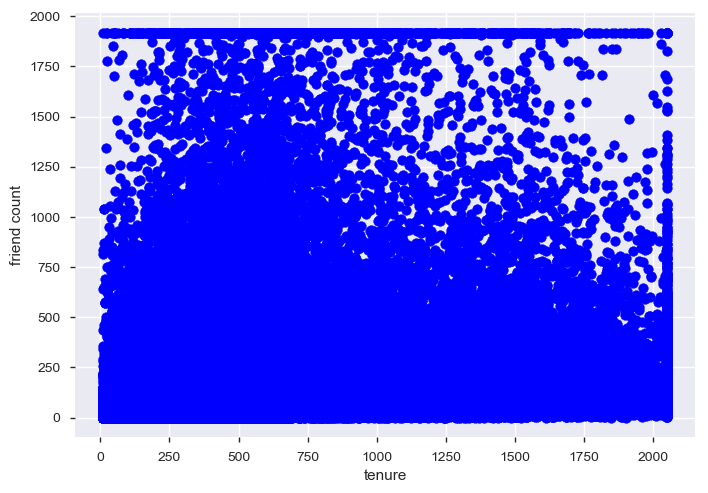

In [97]:
plt.scatter(df_drop.tenure,df_drop.friend_count,color = 'blue')
plt.xlabel('tenure')
plt.ylabel('friend count')
plt.show()

In [37]:
#plt.hist?

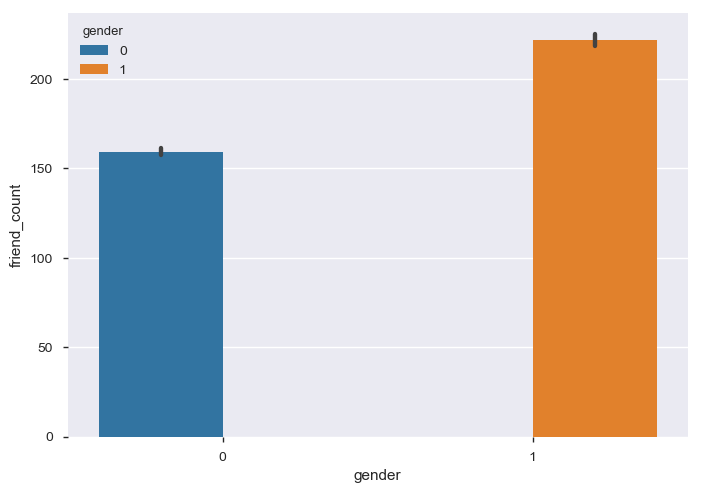

In [98]:
#0 is male and 1 is female
sns.barplot(x=df_drop['gender'],y=df_drop['friend_count'], hue=df_drop.gender)

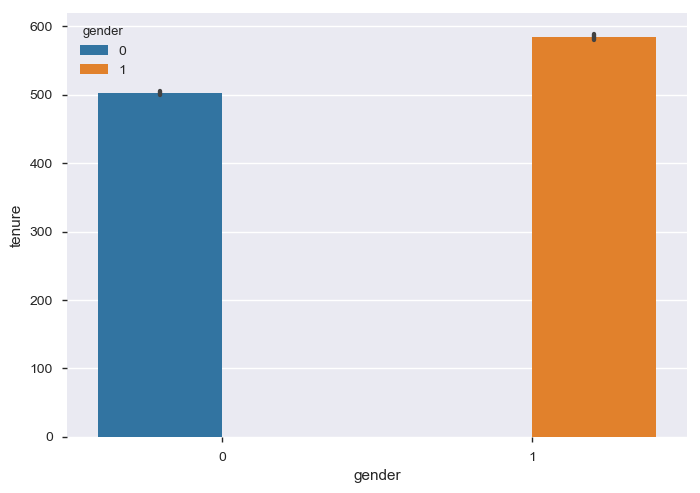

In [99]:
#0 is male and 1 is female
sns.barplot(x=df_drop['gender'],y=df_drop['tenure'], hue=df_drop.gender)

In [100]:
df_h=pd.DataFrame([df_drop.tenure,df_drop.friend_count,df_drop.likes_received]).transpose()
df_h.head()

,tenure,friend_count,likes_received
0,266.0,0.0,0.0
1,11.0,0.0,0.0
2,13.0,0.0,0.0
3,93.0,0.0,0.0
4,82.0,0.0,0.0


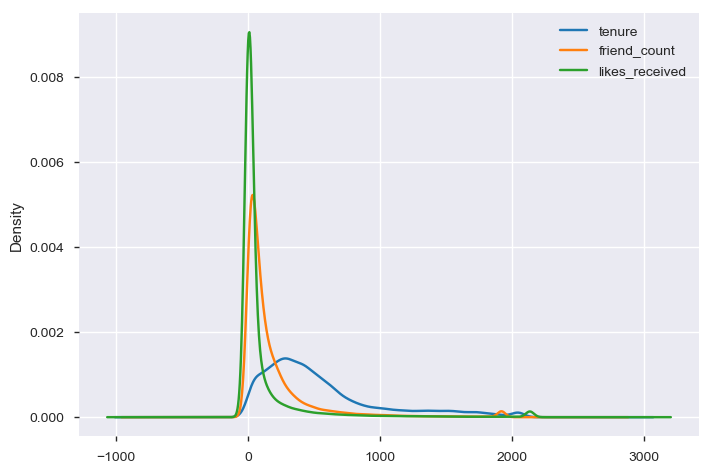

In [101]:
#frquency polygon
df_h.plot(kind='density')